# Simple implementation of Simple Traffic Light Segmentation Neural Net



# Datasets

I will create a dataset of generic shapes and train the neural net to segment the images first by colour and then by shapes.


## Colour data set

In [1]:
import numpy as np
import pandas as pd
import re


# Show images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob

import random

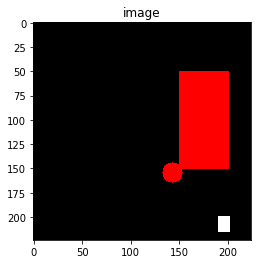

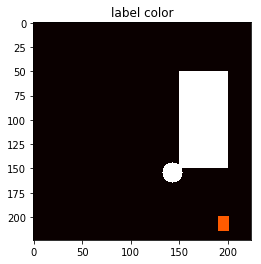

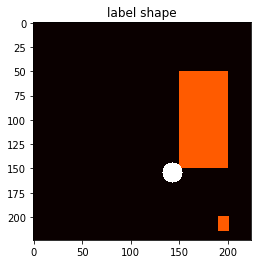

Image size (224, 224, 3)


In [2]:
class TrainingImage:
    """ 
    This class handles the creation of training
    images and the associated label image
    """
    #Colors classes    
    BLACK_CLASS = 0
    WHITE_CLASS = 1
    RED_CLASS = 2
    LIME_CLASS = 3
    BLUE_CLASS = 4
    YELLOW_CLASS = 5
    CYAN_CLASS = 6
    MAGENTA_CLASS = 7
    SILVER_CLASS = 8
    GRAY_CLASS = 9
    MAROON_CLASS = 10
    OLIVE_CLASS = 11
    GREEN_CLASS = 12
    PURPLE_CLASS = 13
    TEAL_CLASS = 14
    NAVY_CLASS = 15
    
    COLOR = {
        BLACK_CLASS : (0,0,0),
        WHITE_CLASS : (255,255,255),
        RED_CLASS : (255,0,0),
#         LIME_CLASS : (0,255,0),
#         BLUE_CLASS : (0,0,255),
#         YELLOW_CLASS : (255,255,0),
#         CYAN_CLASS : (0,255,255),
#         MAGENTA_CLASS : (255,0,255),
#         SILVER_CLASS : (192,192,192),
#         GRAY_CLASS : (128,128,128),
#         MAROON_CLASS : (128,0,0),
#         OLIVE_CLASS : (128,128,0),
#         GREEN_CLASS : (0,128,0),
#         PURPLE_CLASS : (128,0,128),
#         TEAL_CLASS : (0,128,128),
#         NAVY_CLASS : (0,0,128),
    }
    
    NO_SHAPE = 0
    RECTANGLE_CLASS = 1
    CIRCLE_CLASS = 2
    
    MIN_SIZE = 10
    MAX_SIZE = 20
    
    
    def __init__(self, size=(224,224, 3), backgd_color_class=BLACK_CLASS):
        self.size = size
        self.createImageBackground(backgd_color_class)
        
    def clear(self):
        self.image = np.zeros(self.size, dtype=np.uint8)
        self.label = np.zeros(self.size[0:2] + (len(TrainingImage.COLOR.keys()), ) , dtype=np.uint8)
        self.label_shape = np.zeros(self.size[0:2] + (self.CIRCLE_CLASS+1, ) , dtype=np.uint8)
        
    def createImageBackground(self, backgd_color_class):
        self.backgd_color_class = backgd_color_class
        self.clear()
        for channel in range(0, 3):
            self.image[:,:,channel] = TrainingImage.COLOR[self.backgd_color_class][channel]
        self.label[:,:, self.backgd_color_class] = 1
    
    def createRectangle(self, pt1, pt2, color_class=WHITE_CLASS):
        cv2.rectangle(self.image, 
                      pt1[::-1], pt2[::-1], TrainingImage.COLOR[color_class], thickness=cv2.FILLED)
        self.label[pt1[0]:pt2[0],pt1[1]:pt2[1], :] =  0 # Clear exisiting labels in target color position
        self.label[pt1[0]:pt2[0],pt1[1]:pt2[1], color_class] =  1 # Set exisiting labels in target color class position
        
        
        self.label_shape[pt1[0]:pt2[0],pt1[1]:pt2[1], :] =  0 # Clear exisiting labels in target position
        self.label_shape[pt1[0]:pt2[0],pt1[1]:pt2[1], self.RECTANGLE_CLASS] =  1 # Set exisiting labels in target shape class position
        
    def createCircle(self, center, radius, color_class=WHITE_CLASS):
        cv2.circle(self.image, center[::-1], radius, TrainingImage.COLOR[color_class], thickness=cv2.FILLED) 
        # Clear exisiting labels in target position
        
        for chan in range(self.label_shape.shape[2]):
            label_chan = np.array(self.label_shape[:,:,chan])
            self.label_shape[:,:,chan] = cv2.circle(label_chan, center[::-1], radius,
                                                    0, thickness=cv2.FILLED)
        
        for chan in range(self.label.shape[2]):
            label_chan = np.array(self.label[:,:,chan])
            self.label[:,:,chan] = cv2.circle(label_chan, center[::-1], radius,
                                                    0, thickness=cv2.FILLED)
            
        # Set label pixel for the shape class channel
        self.label_shape[:,:, self.CIRCLE_CLASS] = cv2.circle(np.array(self.label[:,:, self.CIRCLE_CLASS]), 
                                                       center[::-1], radius, 1, thickness=cv2.FILLED)
        # Set label pixel for the color class channel
        self.label[:,:,color_class] = cv2.circle(np.array(self.label[:,:,color_class]), 
                                                       center[::-1], radius, 1, thickness=cv2.FILLED)
    
    def addRandRectangle(self, color_class=WHITE_CLASS):
        image_size = self.image.shape
        pt1 = (random.randint(0, image_size[0]-self.MAX_SIZE), 
               random.randint(0, image_size[1] - self.MAX_SIZE))
        pt2 = (random.randint(pt1[0]+self.MIN_SIZE, min(image_size[0]-1, pt1[0]+self.MAX_SIZE) ),
               random.randint(  pt1[1]+self.MIN_SIZE, min(image_size[1]-1, pt1[1]+self.MAX_SIZE) ))
        self.createRectangle( pt1, pt2, color_class=color_class)
        
    def addRandCircle(self, color_class=WHITE_CLASS):
        image_size = self.image.shape
        center = (random.randint(self.MIN_SIZE, image_size[0]-self.MAX_SIZE), 
                  random.randint(self.MIN_SIZE, image_size[1]-self.MAX_SIZE))
        radius = random.randint(self.MIN_SIZE//2, self.MAX_SIZE//2)
        self.createCircle( center, radius, color_class=color_class)


image_size = (224,224, 3)
trainim = TrainingImage(size=image_size , backgd_color_class=TrainingImage.BLACK_CLASS)
trainim.createRectangle( (50,150) , (150,200), color_class=TrainingImage.RED_CLASS)
trainim.addRandRectangle(TrainingImage.WHITE_CLASS)
trainim.addRandCircle(TrainingImage.RED_CLASS)
#trainim.createCircle( (150, 20), 100 )

# Plot background 
plt.imshow(trainim.image)
plt.title('image')
plt.show()

# Plot background 
plt.imshow(trainim.label.argmax(axis=2), cmap='hot')
plt.title('label color')
plt.show()

plt.imshow(trainim.label_shape.argmax(axis=2), cmap='hot')
plt.title('label shape')
plt.show()




print('Image size {}'.format(trainim.image.shape))

In [3]:
# Generate color training dataset
from functools import reduce


NUM_TRAIN = 512
num_classes = len(TrainingImage.COLOR.keys())
image_size = (224,224, 3)
label_size = (224,224, num_classes)
size_in_memory = 1
image_mem = reduce(lambda a,b : a*b ,image_size, 1)
label_mem = reduce(lambda a,b : a*b ,label_size, 1)
total_train_mem = NUM_TRAIN * (image_mem + label_mem)
print('Total size of the use of memory : {}MB'.format(total_train_mem/(1024*1024)))



def generateRectangleData(X, y, num_samples):
    trainim = TrainingImage(size=image_size)
    for i in range(num_samples):
        trainim.createImageBackground(TrainingImage.BLACK_CLASS)
        for j in range(20):
            trainim.addRandRectangle(color_class=random.randint(1, num_classes-1))

        X[i] = trainim.image
        y[i] = trainim.label
    return X, y

X_TRAIN_SIZE = (NUM_TRAIN,) + image_size
Y_TRAIN_SIZE = (NUM_TRAIN,) + image_size[0:2] + (num_classes, )
X_train = np.zeros(X_TRAIN_SIZE, dtype=np.uint8)
y_train = np.zeros(Y_TRAIN_SIZE, dtype=np.uint8)
X_train, y_train = generateRectangleData(X_train, y_train, NUM_TRAIN)

NUM_VAL = 64
X_VAL_SIZE = (NUM_VAL,) + image_size
Y_VAL_SIZE = (NUM_VAL,) + image_size[0:2] + (num_classes, )
X_val = np.zeros(X_VAL_SIZE, dtype=np.uint8)
y_val = np.zeros(Y_VAL_SIZE, dtype=np.uint8)
X_val, y_val = generateRectangleData(X_val, y_val, NUM_VAL)

# Training statistics
count_pixel_classes = y_train.astype(np.uint64).sum(axis=0).sum(axis=0).sum(axis=0)
count_all_pixel_images = np.prod(y_train.shape)
print('sum_classes',count_pixel_classes,'count_all_pixel_images',count_all_pixel_images)

classes_freq = count_pixel_classes/count_all_pixel_images
print('classes_freq',classes_freq)

# Median balancing for segmentation https://arxiv.org/pdf/1511.00561.pdf
median_balancing_weights = np.median(classes_freq)/classes_freq
print('median balancing', median_balancing_weights)

Total size of the use of memory : 147.0MB
sum_classes [23509484  1064272  1116356] count_all_pixel_images 77070336
classes_freq [ 0.30503933  0.0138091   0.0144849 ]
median balancing [ 0.04748535  1.04893862  1.        ]


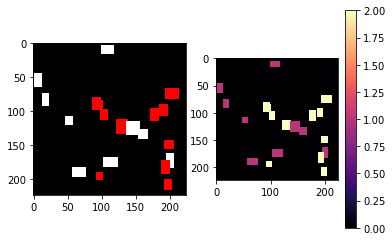

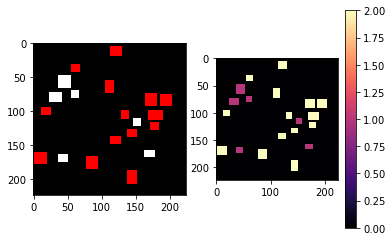

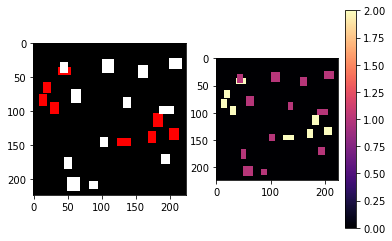

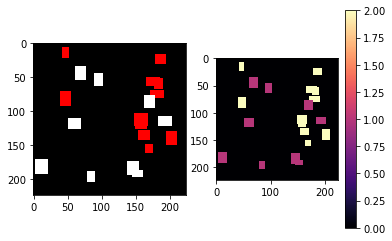

In [4]:
# Plot color evaluation dataset

for idx in range(3,7):

    fig = plt.figure(1)
    ax = fig.add_subplot(1,2,1)
    imsh = ax.imshow( X_train[idx], cmap='magma')

    ax = fig.add_subplot(1,2,2)
    imsh = ax.imshow( y_train[idx,:,:,:].argmax(axis=2), cmap='magma')
    plt.colorbar(imsh)
    plt.show()


In [5]:
w=median_balancing_weights
print(w)
#w = np.reshape(w,(1,1,3))
#print('reshaped',w)
print('tile')
print(np.tile(w,(1,2,1)) )

[ 0.04748535  1.04893862  1.        ]
tile
[[[ 0.04748535  1.04893862  1.        ]
  [ 0.04748535  1.04893862  1.        ]]]


# Model
The original paper uses VGG for implementing the detector.


TODO : Will try experimenting with Xception and MobileNet  
https://keras.io/applications/#usage-examples-for-image-classification-models


In [6]:

# Extract features from an arbitrary intermediate layer with VGG19

from segmodel import SegModel

# Extract pooling layers out of VGG-16
num_classes = len(TrainingImage.COLOR.keys())

segModel = SegModel(num_classes, class_weight=median_balancing_weights) 
model = segModel.getModel()


Using TensorFlow backend.


Pre-trained model loaded.
weights.shape (224, 224, 3)
sigmoided_matrix_in.shape (?, 224, 224, 3)
sigmoided_matrix.shape (?, 224, 224, 3)
sum_sig.shape (?, 224, 224)
weights.shape (224, 224, 3)
sigmoided_matrix_in.shape (?, 224, 224, 3)
sigmoided_matrix.shape (?, 224, 224, 3)
sum_sig.shape (?, 224, 224)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
___

In [7]:
## Loss function definition

In [8]:
from keras import backend as K
import tensorflow as tf

# https://github.com/jocicmarko/ultrasound-nerve-segmentation/blob/9d0fb65d67334dc332816bcb30d317c2de8b9137/train.py#L23

def dice_coef(y_true, y_pred):
    smooth = 1.0e1
    y_true_f = K.square(K.flatten(y_true))
    y_pred_f = K.square(K.flatten(y_pred))
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def jaccard_coef(y_true, y_pred):
    smooth = 1.0e1
    y_true_f = K.flatten(y_true) > 1e-5
    y_pred_f = K.flatten(y_pred) > 1e-5
    intersection = K.cast(tf.logical_and(y_true_f, y_pred_f), 'float32')
    union = K.cast(tf.logical_or(y_true_f, y_pred_f), 'float32')
    i_mean = K.mean(intersection, axis=0)
    u_mean = K.mean(union, axis=0)
    return (i_mean + smooth) / (u_mean + smooth)


def dice_coef_loss(y_true, y_pred):
    return -1.0 * dice_coef(y_true, y_pred)

def jaccard_coef_loss(y_true, y_pred):
    return -1.0 * jaccard_coef(y_true, y_pred)

In [9]:
from keras import optimizers
optimizer_selected = optimizers.Adam(lr=1e-3)


my_loss={'final_merge': dice_coef_loss, 'soft_out': 'categorical_crossentropy'}
my_loss_weights={'final_merge': 0.01, 'soft_out': 1.0}
model.compile(optimizer=optimizer_selected, loss=my_loss, loss_weights = my_loss_weights , 
              metrics={'final_merge':'categorical_accuracy', 'soft_out':'categorical_accuracy'})

    
    
history = model.fit(x=X_train, y=[y_train, y_train], batch_size=20, epochs=3, 
                    validation_split=0.0, validation_data=(X_val, [y_val, y_val]), shuffle=True)

Train on 512 samples, validate on 64 samples
Epoch 1/3
512/512 [==============================] - 19s 37ms/step - loss: 1.2071 - final_merge_loss: -0.6494 - soft_out_loss: 1.2136 - final_merge_categorical_accuracy: 0.8769 - soft_out_categorical_accuracy: 0.6178 - val_loss: 0.6207 - val_final_merge_loss: -0.7244 - val_soft_out_loss: 0.6280 - val_final_merge_categorical_accuracy: 0.9147 - val_soft_out_categorical_accuracy: 0.9835
Epoch 2/3
512/512 [==============================] - 13s 26ms/step - loss: 0.5637 - final_merge_loss: -0.7441 - soft_out_loss: 0.5711 - final_merge_categorical_accuracy: 0.9151 - soft_out_categorical_accuracy: 0.9877 - val_loss: 0.4853 - val_final_merge_loss: -0.7634 - val_soft_out_loss: 0.4929 - val_final_merge_categorical_accuracy: 0.9147 - val_soft_out_categorical_accuracy: 0.9911
Epoch 3/3
512/512 [==============================] - 14s 27ms/step - loss: 0.4489 - final_merge_loss: -0.7908 - soft_out_loss: 0.4568 - final_merge_categorical_accuracy: 0.9151 - so

Time for inference : 373.3096122741699ms


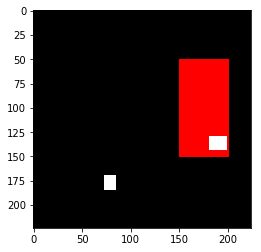

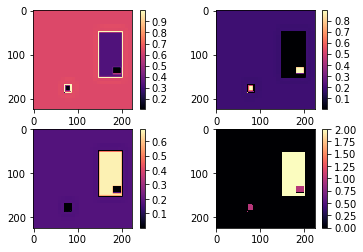

In [10]:
import time
# #Plot loss function
# plt.plot(history.epoch,history.history['loss'])
# plt.legend(('loss'))
# plt.grid('on')
# plt.show()

#img = X_train[10]

# Create a brand-new image for testing
trainim = TrainingImage(size=image_size , backgd_color_class=TrainingImage.BLACK_CLASS)
trainim.createRectangle( (50,150) , (150,200), color_class=TrainingImage.RED_CLASS)
trainim.addRandRectangle(TrainingImage.WHITE_CLASS)
trainim.addRandRectangle(TrainingImage.WHITE_CLASS)
trainim.addRandRectangle(TrainingImage.RED_CLASS)
img = trainim.image


start = time.time()
[y_out,y_softmax] = model.predict(img.reshape(1,224,224,3))
end = time.time()
print('Time for inference : {}ms'.format((end - start)*1000))


seg = y_softmax
seg = seg.reshape(224,224, num_classes)

seg_classes=seg.argmax(axis=2)

plt.imshow(img)
plt.show()

fig = plt.figure(1)
fig.clf()
ax = fig.add_subplot(2,2,1)
imsh = ax.imshow( seg[:,:,0], cmap='magma')
fig.colorbar(imsh)

ax = fig.add_subplot(2,2,2)
imsh = ax.imshow( seg[:,:,1], cmap='magma')
fig.colorbar(imsh)

ax = fig.add_subplot(2,2,3)
imsh = ax.imshow( seg[:,:,2], cmap='magma')
fig.colorbar(imsh)

ax = fig.add_subplot(2,2,4)
imsh = ax.imshow( seg_classes, cmap='magma' )
fig.colorbar(imsh)
plt.show()



In [11]:
# Generate shape training dataset
from functools import reduce


NUM_TRAIN = 1024
num_classes = 3
image_size = (224,224, 3)
label_size = (224,224, num_classes)
size_in_memory = 1
image_mem = reduce(lambda a,b : a*b ,image_size, 1)
label_mem = reduce(lambda a,b : a*b ,label_size, 1)
total_train_mem = NUM_TRAIN * (image_mem + label_mem)
print('Total size of the use of memory : {}MB'.format(total_train_mem/(1024*1024)))



def generateShapeData(X, y, num_samples):
    trainim = TrainingImage(size=image_size)
    for i in range(num_samples):
        trainim.createImageBackground(TrainingImage.BLACK_CLASS)
        for j in range(10):
            trainim.addRandRectangle(color_class=TrainingImage.RED_CLASS)
            trainim.addRandCircle(color_class=TrainingImage.RED_CLASS)
        
        X[i] = trainim.image
        y[i] = trainim.label_shape
    return X, y

X_TRAIN_SIZE = (NUM_TRAIN,) + image_size
Y_TRAIN_SIZE = (NUM_TRAIN,) + image_size[0:2] + (num_classes, )
X_train = np.zeros(X_TRAIN_SIZE, dtype=np.uint8)
y_train = np.zeros(Y_TRAIN_SIZE, dtype=np.uint8)
X_train, y_train = generateShapeData(X_train, y_train, NUM_TRAIN)

NUM_VAL = 64
X_VAL_SIZE = (NUM_VAL,) + image_size
Y_VAL_SIZE = (NUM_VAL,) + image_size[0:2] + (num_classes, )
X_val = np.zeros(X_VAL_SIZE, dtype=np.uint8)
y_val = np.zeros(Y_VAL_SIZE, dtype=np.uint8)
X_val, y_val = generateShapeData(X_val, y_val, NUM_VAL)

Total size of the use of memory : 294.0MB


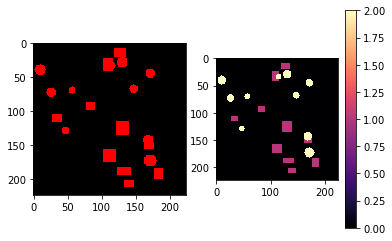

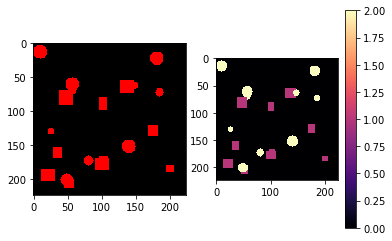

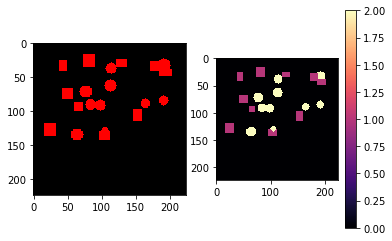

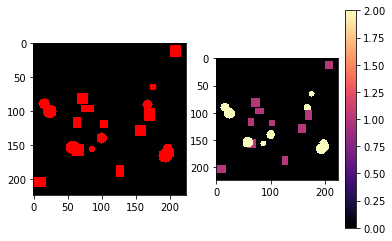

In [12]:
# Plot color evaluation dataset

for idx in range(3,7):

    fig = plt.figure(1)
    ax = fig.add_subplot(1,2,1)
    imsh = ax.imshow( X_train[idx], cmap='magma')

    ax = fig.add_subplot(1,2,2)
    imsh = ax.imshow( y_train[idx,:,:,:].argmax(axis=2), cmap='magma')
    plt.colorbar(imsh)
    plt.show()

In [13]:
from segmodel import SegModel

# Extract pooling layers out of VGG-16
num_classes = 3

segModel = SegModel(num_classes, class_weight=median_balancing_weights) 
model = segModel.getModel()

Pre-trained model loaded.
weights.shape (224, 224, 3)
sigmoided_matrix_in.shape (?, 224, 224, 3)
sigmoided_matrix.shape (?, 224, 224, 3)
sum_sig.shape (?, 224, 224)
weights.shape (224, 224, 3)
sigmoided_matrix_in.shape (?, 224, 224, 3)
sigmoided_matrix.shape (?, 224, 224, 3)
sum_sig.shape (?, 224, 224)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
___

In [14]:
from keras import backend as K
import tensorflow as tf

def jaccard_coef(y_true, y_pred):
    smooth = 1.0e1
    y_true_f = K.batch_flatten(y_true) > 1e-3
    y_pred_f = K.batch_flatten(y_pred) > 1e-3
    union        = K.cast(tf.logical_and(y_true_f, y_pred_f),'float32')
    intersection = K.cast(tf.logical_or(y_true_f, y_pred_f),'float32')
    i = K.mean(intersection)
    u = K.mean(union)
    IoU = (i + smooth) / (u + smooth)
    return IoU 


def jaccard_coef_loss(y_true, y_pred):
    return -jaccard_coef(y_true, y_pred)

Train on 1024 samples, validate on 64 samples
Epoch 1/1
1024/1024 [==============================] - 28s 27ms/step - loss: 0.0668 - final_merge_loss: -1.4277 - soft_out_loss: 0.0811 - final_merge_categorical_accuracy: 0.0904 - soft_out_categorical_accuracy: 0.0356 - val_loss: 0.0600 - val_final_merge_loss: -1.7540 - val_soft_out_loss: 0.0775 - val_final_merge_categorical_accuracy: 0.1140 - val_soft_out_categorical_accuracy: 0.0358


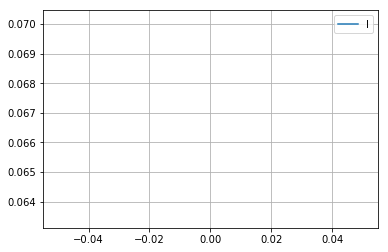

In [15]:
from keras import optimizers
optimizer_selected = optimizers.Adam(lr=1e-3)


my_loss={'final_merge': dice_coef_loss, 'soft_out': 'categorical_crossentropy'}
my_loss_weights={'final_merge': 0.01, 'soft_out': 1.0}
model.compile(optimizer=optimizer_selected, loss=my_loss, loss_weights = my_loss_weights , 
              metrics={'final_merge':'categorical_accuracy', 'soft_out':'categorical_accuracy'})

    
    
history = model.fit(x=X_train, y=[y_train, y_train], batch_size=20, epochs=1, 
                    validation_split=0.0, validation_data=(X_val, [y_val, y_val]), shuffle=True)
import time
#Plot loss function
plt.plot(history.epoch,history.history['loss'])
plt.legend(('loss'))
plt.grid('on')
plt.show()

Time for inference : 126.59788131713867ms


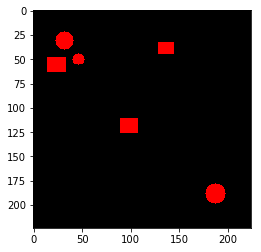

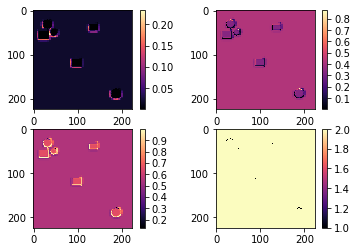

In [16]:
# Create a brand-new image for testing
trainim = TrainingImage(size=image_size , backgd_color_class=TrainingImage.BLACK_CLASS)
trainim.addRandRectangle(TrainingImage.RED_CLASS)
trainim.addRandCircle(TrainingImage.RED_CLASS)
trainim.addRandRectangle(TrainingImage.RED_CLASS)
trainim.addRandCircle(TrainingImage.RED_CLASS)
trainim.addRandRectangle(TrainingImage.RED_CLASS)
trainim.addRandCircle(TrainingImage.RED_CLASS)

img = trainim.image


start = time.time()
[y_out, y_softmax] = model.predict(img.reshape(1,224,224,3))
end = time.time()
print('Time for inference : {}ms'.format((end - start)*1000))

seg = y_softmax
seg = seg.reshape(224,224, num_classes)

seg_classes=seg.argmax(axis=2)

plt.imshow(img)
plt.show()

fig = plt.figure(1)
fig.clf()
ax = fig.add_subplot(2,2,1)
imsh = ax.imshow( seg[:,:,0], cmap='magma')
fig.colorbar(imsh)

ax = fig.add_subplot(2,2,2)
imsh = ax.imshow( seg[:,:,1], cmap='magma')
fig.colorbar(imsh)

ax = fig.add_subplot(2,2,3)
imsh = ax.imshow( seg[:,:,2], cmap='magma')
fig.colorbar(imsh)

ax = fig.add_subplot(2,2,4)
imsh = ax.imshow( seg_classes, cmap='magma' )
fig.colorbar(imsh)
plt.show()



img.shape (224, 224, 3)
img_r.shape (7, 7, 3, 1024)
tr1.shape (7, 7, 3, 1024)


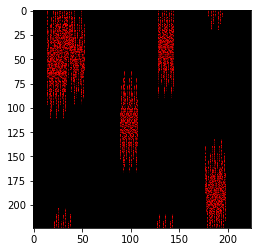

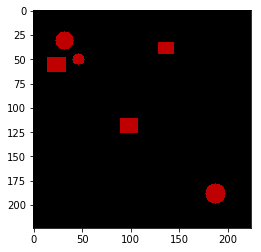

In [19]:
# Experimenting with Discrete Cosine Transform
from scipy.fftpack import dct
from scipy.fftpack import idct
from math import exp


tile_reduc = 32

# The reshape order must be consistent and MUST be F for spatial consistency of the transform data
# If applied to a CNN, we will need to make sure that the 'stride' of the convolutions is consistent with the DCT tile window size
# The DCT must be normalized with we need to compare various window sizes for image reconstitutions
img_r = img.reshape( int(img.shape[0]/tile_reduc),
                    int(img.shape[1]/tile_reduc), 3, tile_reduc*tile_reduc,
                    order='F')

tr0 = dct(img_r,type=2, axis=1, norm='ortho')
tr1 = dct(tr0,type=2, axis=0, norm='ortho')
print('img.shape',img.shape)
print('img_r.shape',img_r.shape)
print('tr1.shape',tr1.shape)

tr1_retiled = np.abs(tr1.reshape(img.shape[0], img.shape[1], 3 , order='F'))

tr_unbias = tr1_retiled-tr1_retiled.min()
log_normal_k = (exp(255) - 1)/tr_unbias.max()
tr_lognorm =np.log( 1 +  tr_unbias*log_normal_k )
tr_norm = tr_unbias/tr_unbias.max()
plt.imshow(tr_lognorm)
plt.show()

trinv1 = idct(tr1, type=2, axis=0, norm='ortho')
trinv0 = idct(trinv1, type=2, axis=1, norm='ortho')


trinv0_retiled = np.abs(trinv0.reshape(img.shape[0], img.shape[1], 3, order='F'))

trinv_unbias = trinv0_retiled-trinv0_retiled.min()
log_normal_k = (exp(255) - 1)/trinv_unbias.max()
trinv_lognorm =np.log( 1 +  trinv_unbias*log_normal_k )
trinv_norm = trinv_unbias/trinv_unbias.max()
plt.imshow((trinv0_retiled+1e-6)*(1-1e-3))
plt.show()

img.shape (224, 224, 3)
img_r.shape (7, 7, 3, 1024)
tr1.shape (7, 7, 3, 1024)


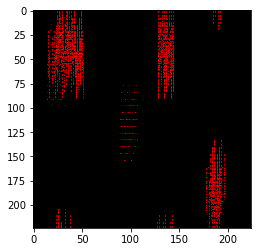

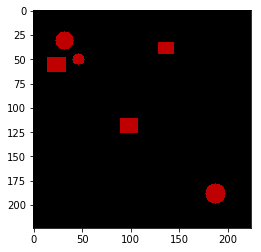

In [132]:
from numpy.fft import fft, rfft
from numpy.fft import ifft, irfft

tile_reduc = 32

# The reshape order must be consistent and MUST be F for spatial consistency of the transform data
# If applied to a CNN, we will need to make sure that the 'stride' of the convolutions is consistent with the DCT tile window size
# The DCT must be normalized with we need to compare various window sizes for image reconstitutions
img_r = img.reshape( int(img.shape[0]/tile_reduc),
                    int(img.shape[1]/tile_reduc), 3, tile_reduc*tile_reduc,
                    order='F')


print('img.shape',img.shape)
print('img_r.shape',img_r.shape)

tr0 = fft(img_r, axis=0)
tr1 = fft(tr0, axis=1)

print('tr1.shape',tr1.shape)

tr1_retiled = np.abs(tr1.reshape(img.shape, order='F'))

tr_unbias = tr1_retiled-tr1_retiled.min()
log_normal_k = (exp(255) - 1)/tr_unbias.max()
tr_lognorm =np.log( 1 +  tr_unbias*log_normal_k )
tr_norm = tr_unbias/tr_unbias.max()
#plt.imshow(tr_lognorm)
plt.imshow(tr1_retiled, cmap='magma')
plt.show()


trinv1 = ifft(tr1, axis=0)
trinv0 = ifft(trinv1, axis=1)


trinv0_retiled = np.abs(trinv0.reshape(img.shape, order='F'))

trinv_unbias = trinv0_retiled-trinv0_retiled.min()
log_normal_k = (exp(255) - 1)/trinv_unbias.max()
trinv_lognorm =np.log( 1 +  trinv_unbias*log_normal_k )
trinv_norm = trinv_unbias/trinv_unbias.max()
plt.imshow((trinv0_retiled+1e-6)*(1-1e-3))
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 224, 224, 3)       0         
_________________________________________________________________
fft_layer (Lambda)           (None, 224, 224, 3)       0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
(224, 224, 3) 0.0 8415.0


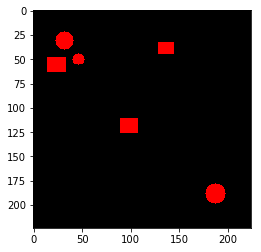

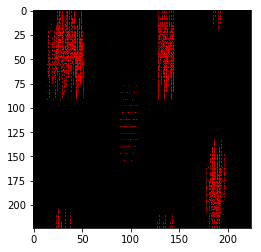

In [137]:
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, UpSampling2D, Activation
from keras.layers import Conv2DTranspose, Add, Flatten, Lambda
from keras.layers import BatchNormalization, Reshape, Permute, Dropout
from keras import backend as K
from keras import regularizers
from keras.models import Model
from keras.layers.advanced_activations import LeakyReLU
from keras.utils.generic_utils import get_custom_objects

import tensorflow as tf

# model_fft = Sequential()
# model_fft.add(Lambda(lambda x: x, input_shape=(img.shape[0], img.shape[1], img.shape[2])))
# model_fft.add(Lambda(lambda x: tf.fft(tf.cast(x, tf.complex64))) )
# model_fft.summary()

inputs = Input(shape=(img.shape[0], img.shape[1], img.shape[2]), name='input')
fft_layer = Lambda(lambda x: tf.fft(tf.cast(x, tf.complex64)), name='fft_layer')(inputs)
model_fft = Model(inputs=inputs, outputs=fft_layer)
model_fft.summary()

tile_reduc = 32

# The reshape order must be consistent and MUST be F for spatial consistency of the transform data
# If applied to a CNN, we will need to make sure that the 'stride' of the convolutions is consistent with the DCT tile window size
# The DCT must be normalized with we need to compare various window sizes for image reconstitutions
img_r = img.reshape( int(img.shape[0]/tile_reduc),
                    int(img.shape[1]/tile_reduc), 3, tile_reduc*tile_reduc,
                    order='F')
img_r_T = np.transpose(img_r, (2,3, 0,1)) # Make dim mapping as (0,1, 2,3) -> (2,3, 0,1)
y_out_T = fft(img_r_T) # Compute FFT on dim 1 of the original image reshaped
img_r_T = y_out_T.transpose( (0,1, 3,2) ) # Make dim mapping as (0,1, 2,3) -> (2,3, 0,1) -> (2,3, 1,0) 
y_out_T = fft(img_r_T) 
# Make the dimension mapping back to original
y_out = y_out_T.transpose( (3,2, 0,1) )  # Make dim mapping as (0,1, 2,3) -> (2,3, 0,1) -> (2,3, 1,0) -> (0,1, 2,3)
img_out = np.abs(y_out)

img_out = img_out.reshape(img.shape, order='F')

print(img_out.shape, img_out.min(), img_out.max())


plt.imshow(img)
plt.show()

plt.imshow(img_out, cmap='magma')
plt.show()

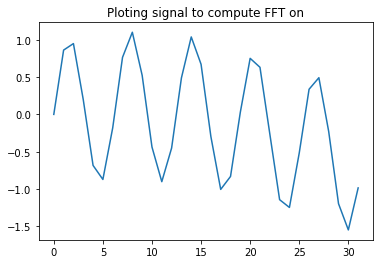

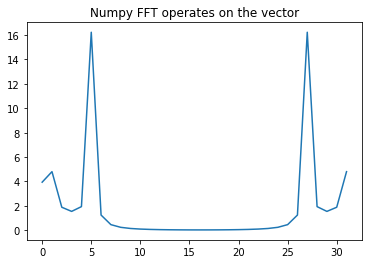

Reshaping the vector into a Matrix (identical elements along dim=0) to check which dimension the FFT operates on


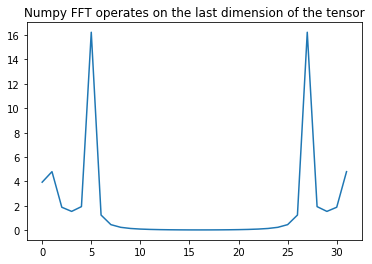

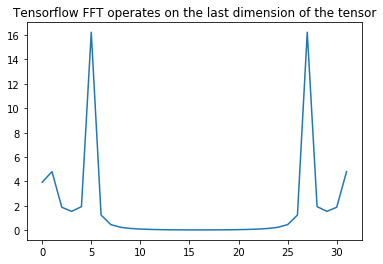

In [109]:

x_gen = np.arange(32)
x_sig = np.sin(x_gen) + np.sin(x_gen/50.0)*np.cos(x_gen/10.0)

plt.plot(x_gen,x_sig)
plt.title('Ploting signal to compute FFT on')
plt.show()

fft_y = np.fft.fft(x_sig2d)
plt.plot(np.abs(fft_y[0,:]))
plt.title('Numpy FFT operates on the vector')
plt.show()

print('Reshaping the vector into a Matrix (identical elements along dim=0) to check which dimension the FFT operates on')
x_sig2d = x_sig.reshape((1,)+x_sig.shape).repeat(8, axis=0)

fft_y = np.fft.fft(x_sig2d)
plt.plot(np.abs(fft_y[0,:]))
plt.title('Numpy FFT operates on the last dimension of the tensor')
plt.show()

model_fft = Sequential()
model_fft.add(Lambda(lambda x: x, input_shape=x_sig2d.shape))
model_fft.add(Lambda(lambda x: tf.abs(tf.fft(tf.cast(x, tf.complex64)))) )

fft_y = model_fft.predict( x_sig2d.reshape((1,) + x_sig2d.shape) )
fft_y = fft_y[0]
plt.plot(fft_y[0,:])
plt.title('Tensorflow FFT operates on the last dimension of the tensor')
plt.show()
